In [50]:
# Visualisation des données
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Pré-traitement des données
from sklearn.model_selection import train_test_split

# Pour tester les performances des modèles utilisés
from sklearn import metrics

# Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [28]:
data_iris = pd.read_csv('./Iris.csv')
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 3. Analyse des données du dataset

In [6]:
data_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data_iris.drop(['Id'], axis=1, inplace=True)

In [11]:
data_iris.groupby("Species").mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [15]:
data_iris.isnull().count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

On vient bien qu'on a aucune valeur manquante dans notre dataset et les valeurs sont relativement homogènes pour chaque espèces

### 2. Visualisation des données

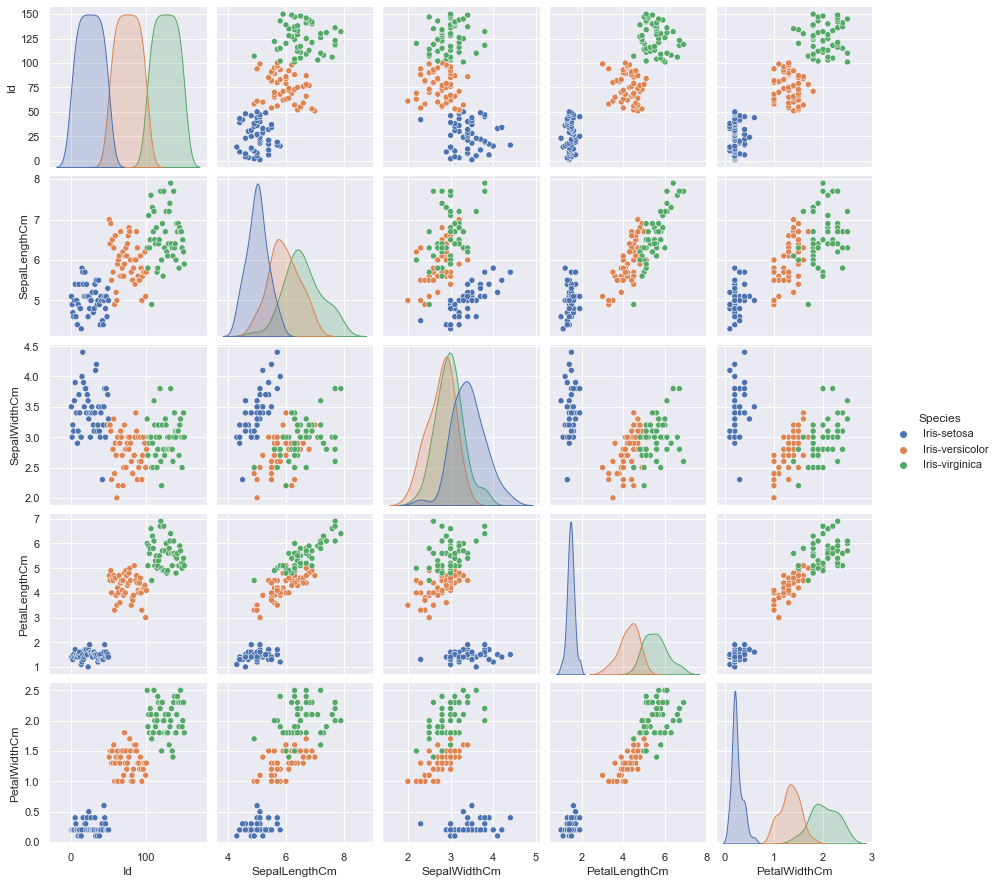

In [29]:
sns.pairplot(data_iris, hue='Species')

On observe bien que la classe Sétosa est assez distinctes des deux autres espèces, on le voit assez clairement, on continue la visualisation des données, en prenant maintenant chaque variables à part entière

C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Largeur du pétale (cm)')

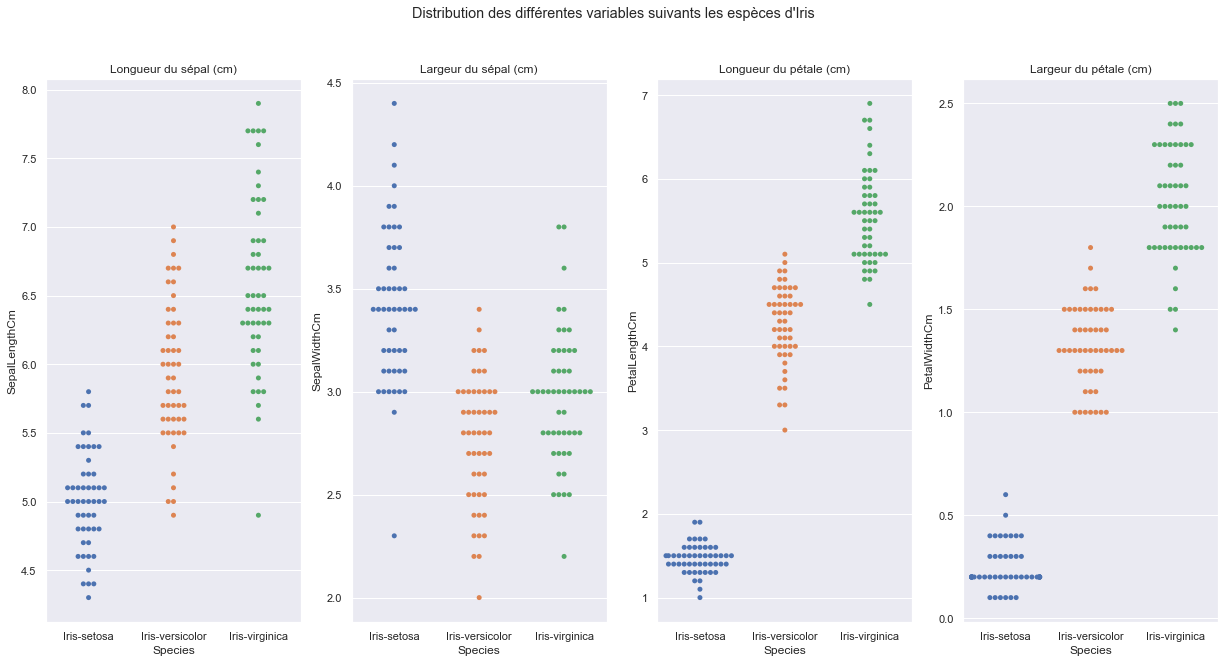

In [22]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(1, 4, figsize=(21, 10))
fig.suptitle('Distribution des différentes variables suivants les espèces d\'Iris')

sns.swarmplot(ax=axes[0], x="Species", y="SepalLengthCm", data=data_iris)
axes[0].set_title('Longueur du sépal (cm)')

sns.swarmplot(ax=axes[1], x="Species", y="SepalWidthCm", data=data_iris)
axes[1].set_title('Largeur du sépal (cm)')

sns.swarmplot(ax=axes[2], x="Species", y="PetalLengthCm", data=data_iris)
axes[2].set_title('Longueur du pétale (cm)')

sns.swarmplot(ax=axes[3], x="Species", y="PetalWidthCm", data=data_iris)
axes[3].set_title('Largeur du pétale (cm)')

Avec un autre type d'affichage

Text(0.5, 1.0, 'Largeur du pétale (cm)')

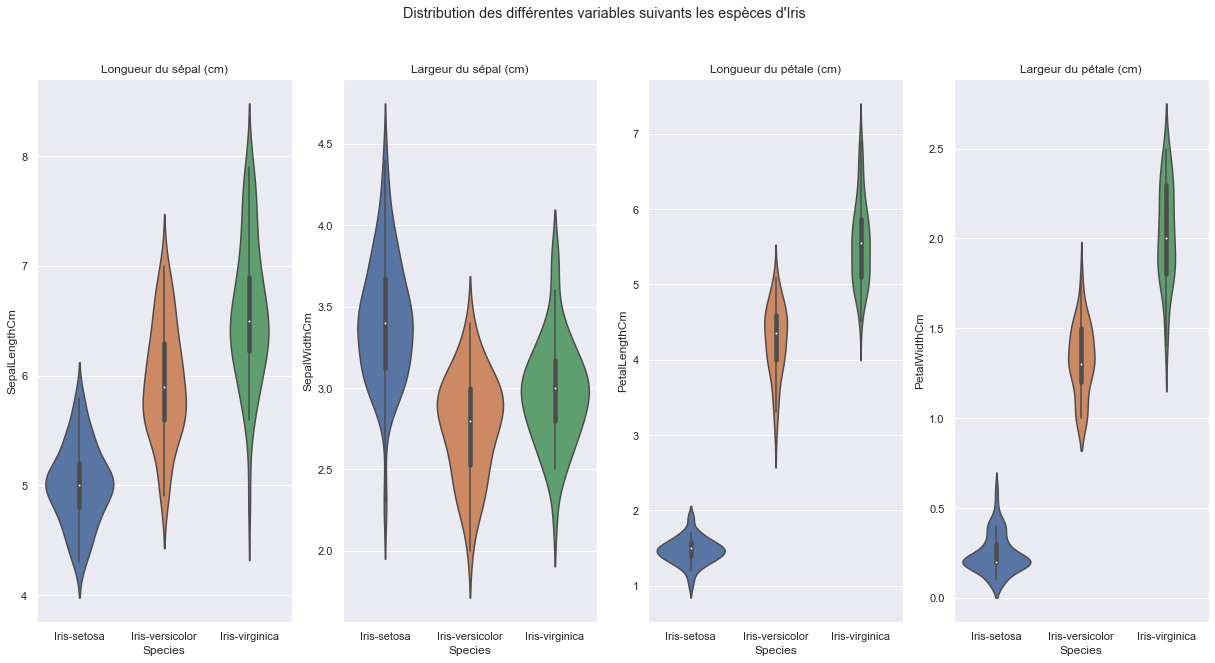

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(21, 10))
fig.suptitle('Distribution des différentes variables suivants les espèces d\'Iris')

sns.violinplot(ax=axes[0], x="Species", y="SepalLengthCm", data=data_iris)
axes[0].set_title('Longueur du sépal (cm)')

sns.violinplot(ax=axes[1], x="Species", y="SepalWidthCm", data=data_iris)
axes[1].set_title('Largeur du sépal (cm)')

sns.violinplot(ax=axes[2], x="Species", y="PetalLengthCm", data=data_iris)
axes[2].set_title('Longueur du pétale (cm)')

sns.violinplot(ax=axes[3], x="Species", y="PetalWidthCm", data=data_iris)
axes[3].set_title('Largeur du pétale (cm)')

### 3. Classification
#### Préparation des données

In [30]:
etiq = data_iris['Species']
data_iris.drop(['Species'],axis=1,inplace=True)

In [36]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(data_iris, etiq, test_size=0.3,random_state=23)

#### a. Random Forrest

In [46]:
forrest = RandomForestClassifier(n_estimators = 3, max_features = 'sqrt', criterion = 'entropy').fit(fv_train,etiq_train)
yforrest = forrest.predict(fv_test)
print("Taux de précision lors de l'entrainement : ",metrics.accuracy_score(etiq_train, forrest.predict(fv_train)))
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, yforrest))

Taux de précision lors de l'entrainement :  1.0
Taux de précision lors des tests :  1.0


On voit bien que dans ce genre de problème que des algorithmes tels que le Random Forrest est très puissant pour nous donner le résultat avec une classification parfaite, on va refaire mais avec un seul arbre de décision
#### b. Decision Tree

In [47]:
dTree = tree.DecisionTreeClassifier(random_state=0, criterion='entropy').fit(fv_train,etiq_train)
ydTree = dTree.predict(fv_test)
print("Taux de précision lors de l'entrainement : ",metrics.accuracy_score(etiq_train, dTree.predict(fv_train)))
print("Taux de précision lors des tests : ",metrics.accuracy_score(etiq_test, ydTree))

Taux de précision lors de l'entrainement :  1.0
Taux de précision lors des tests :  0.9777777777777777


On voit bien qu'avec un seul arbre on a d'excellent résultat avec 97.78% de précision, on affiche la matrice de confusion pour voir les erreurs de classification

Text(0.5, 1.0, "Matrice de confusion avec l'algorithme basé sur un arbre de décision")

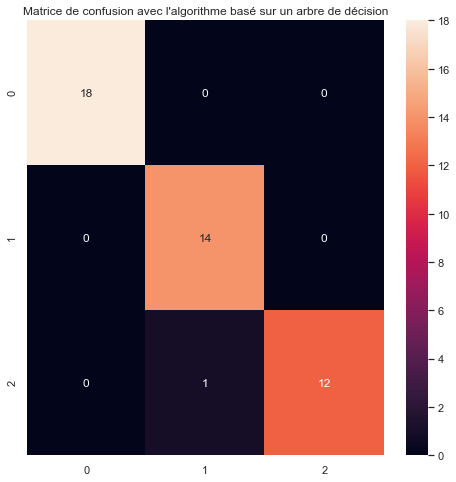

In [48]:
plt.figure(figsize=(8,8))
sns.heatmap(metrics.confusion_matrix(etiq_test, ydTree), annot=True)
plt.title("Matrice de confusion avec l'algorithme basé sur un arbre de décision")

On voit bien qu'on a qu'un seul cas mal classé ce qui prouve un sans faute, on affiche maintenant l'arbre de décision 

Text(0.5, 1.0, 'Arbre de décision permettant la classification des Iris suivant leur espèce')

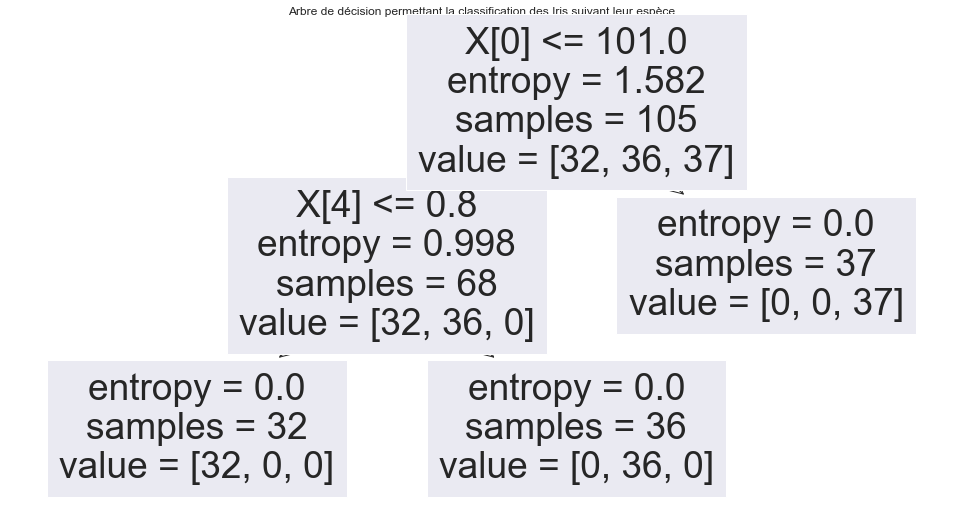

In [49]:
plt.figure(figsize=(17,9))
_= tree.plot_tree(dTree)
plt.title("Arbre de décision permettant la classification des Iris suivant leur espèce")